# Find facial features in picture

In [4]:
import cv2
import sys
import uuid
import os

# if len(sys.argv) != 3:
#     print(str(len(sys.argv)) + ' args provided')
#     sys.exit('Usage: python ' + sys.argv[0] + ' SrcImgDir DstFaceDir')

# imagePath = sys.argv[1]
# facePath = sys.argv[2]
imagePath = 'xx/train/'
facePath = 'xx/encode/'
base_dir = ''
# base_dir = os.path.dirname(__file__)
# base_dir = os.getcwd()


if not os.path.exists(base_dir + facePath):
	os.makedirs(base_dir + facePath)

count = 0
for file in os.listdir(base_dir + imagePath):
	file_name, file_extension = os.path.splitext(file)
	if (file_extension in ['.png','.jpg']):
		image = cv2.imread(base_dir + imagePath + '/' + file)
		print("Processing: " + base_dir + imagePath + '/' + str(file))
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		
		faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
		faces = faceCascade.detectMultiScale(
		    gray,
		    scaleFactor=1.3,
		    minNeighbors=3,
 		    minSize=(50, 50)
		)
		print("Found {0} Faces".format(len(faces)))

		for (x, y, w, h) in faces:
			cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
			roi_color = image[y:y + h, x:x + w]
			faceFile = str(uuid.uuid4()) + '.jpg'
			count += 1
			cv2.imwrite(base_dir + facePath + '/' + faceFile, roi_color)
			print("Saving 1 face: ", facePath + '/' + faceFile)

print("Extracted " + str(count) + " faces from all images")

Processing: xx/train//Screen Shot 2022-11-01 at 8.15.03 PM.jpg
Found 2 Faces
Saving 1 face:  xx/encode//e1d6640a-8db0-4ef1-bb45-bea2d36b3fdb.jpg
Saving 1 face:  xx/encode//75be33d4-26c6-4968-aa4e-8b97422980b1.jpg
Processing: xx/train//Screen Shot 2022-10-31 at 10.00.09 PM.jpg
Found 1 Faces
Saving 1 face:  xx/encode//44536654-dd76-4cd9-bca3-5941c37a4dbb.jpg
Extracted 3 faces from all images


In [1]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp39-cp39-macosx_10_15_x86_64.whl size=3624978 sha256=9a585b8c2041d15dbc794b1fd1a38d9589f7fff1b80666c87953a0969e58ed14
  Stored in directory: /Users/wendywang/Library/Caches/pip/wheels/f7/ae/0e/3478eae12f6aed0e3d4880147ca855ba5d58f2e1098c73ab5f
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=c3749484c0845e6225367b4a20c67cd7ad9058c520a9d26357e5eb8c082db93c
  Stored in directory: /Users/wendywang/Library/Caches/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built dlib face-recognition-models


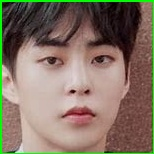

In [3]:
from IPython.display import Image, display
import face_recognition

picFile = "fe/997b2c56-9640-400e-b5b0-21c266aa420d.jpg"

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(picFile)
Image(filename=picFile)

# Process and output

Found 1 face in this photograph.
The chin in this face has the points: [(13, 63), (14, 78), (16, 93), (20, 108), (27, 121), (37, 132), (50, 141), (64, 147), (78, 149), (91, 145), (102, 137), (111, 127), (116, 115), (120, 102), (123, 89), (125, 75), (125, 62)]
The left_eyebrow in this face has the points: [(32, 46), (41, 40), (51, 39), (61, 41), (70, 44)]
The right_eyebrow in this face has the points: [(86, 44), (95, 40), (104, 39), (113, 40), (119, 46)]
The nose_bridge in this face has the points: [(79, 58), (80, 66), (81, 74), (82, 83)]
The nose_tip in this face has the points: [(70, 93), (75, 94), (80, 95), (85, 95), (89, 93)]
The left_eye in this face has the points: [(42, 61), (49, 58), (56, 58), (62, 63), (56, 64), (49, 64)]
The right_eye in this face has the points: [(91, 62), (97, 57), (104, 57), (110, 60), (105, 63), (98, 63)]
The top_lip in this face has the points: [(61, 117), (68, 110), (75, 106), (80, 107), (85, 106), (90, 110), (96, 116), (93, 116), (85, 113), (80, 114), (

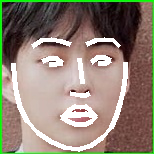

In [4]:
from PIL import Image, ImageDraw

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("Found {} face in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
display(pil_image)